# Clone Repository

In [4]:
!git clone https://github.com/tcl002/CSE151AProject.git

fatal: destination path 'CSE151AProject' already exists and is not an empty directory.


# Import Libraries

In [19]:
# data visualization imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing imports
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# model implementation imports
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Import Data

In [20]:
df = pd.read_csv("CSE151AProject/dataset/data.csv", sep=';')

display(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [21]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [41]:
df.describe() # watch count mean std min 25% 50% 75% max

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [22]:
df.dtypes
# total of data type

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [23]:
categorical = np.array(['Application mode', 'Application order', 'Course','Previous qualification','Nacionality',
                        'Marital status', 'Mother\'s qualification', 'Father\'s qualification','Mother\'s occupation','Father\'s occupation'])
numerical = np.array(['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
                      'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)',
                      'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                      'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)',
                      'Previous qualification (grade)','Admission grade','Age at enrollment','Unemployment rate','Inflation rate', 'GDP'])
binary = np.array(['Daytime/evening attendance\t','Displaced', 'Educational special needs', 'Debtor','Tuition fees up to date','Gender',
                   'Scholarship holder','International'])

#Encode Target

In [24]:
enc = OneHotEncoder()
enc_target_arr = enc.fit_transform(df.Target.values.reshape(-1,1)).toarray()
enc_target_df = pd.DataFrame(enc_target_arr, columns = list(enc.categories_[0]))
prepro_df = pd.concat([df.drop(columns=["Target"]), enc_target_df], axis = 1)
prepro_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,Enrolled,Graduate
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,1.0,0.0,0.0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,0.0,0.0,1.0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,1.0,0.0,0.0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,0.0,0.0,1.0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,8,5,12.666667,0,15.5,2.8,-4.06,0.0,0.0,1.0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,2,11.000000,0,11.1,0.6,2.02,1.0,0.0,0.0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,9,1,13.500000,0,13.9,-0.3,0.79,1.0,0.0,0.0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,6,5,12.000000,0,9.4,-0.8,-3.12,0.0,0.0,1.0


# MinMax Normalization

In [25]:
prepro_df[numerical].describe().round(2)

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,0.71,6.27,8.30,4.71,10.64,0.14,0.54,6.23,8.06,4.44,10.23,0.15,132.61,126.98,23.27,11.57,1.23,0.00
std,2.36,2.48,4.18,3.09,4.84,0.69,1.92,2.20,3.95,3.01,5.21,0.75,13.19,14.48,7.59,2.66,1.38,2.27
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,95.00,95.00,17.00,7.60,-0.80,-4.06
25%,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.75,0.00,125.00,117.90,19.00,9.40,0.30,-1.70
50%,0.00,6.00,8.00,5.00,12.29,0.00,0.00,6.00,8.00,5.00,12.20,0.00,133.10,126.10,20.00,11.10,1.40,0.32
75%,0.00,7.00,10.00,6.00,13.40,0.00,0.00,7.00,10.00,6.00,13.33,0.00,140.00,134.80,25.00,13.90,2.60,1.79
max,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,33.00,20.00,18.57,12.00,190.00,190.00,70.00,16.20,3.70,3.51


In [26]:
scaler = MinMaxScaler()
prepro_df[numerical] = pd.DataFrame(scaler.fit_transform(prepro_df[numerical]), columns = numerical)
prepro_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,Enrolled,Graduate
0,1,17,5,171,1,1,0.284211,1,19,12,...,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1.0,0.0,0.0
1,1,15,1,9254,1,1,0.684211,1,1,3,...,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,0.0,0.0,1.0
2,1,1,5,9070,1,1,0.284211,1,37,37,...,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1.0,0.0,0.0
3,1,17,2,9773,1,1,0.284211,1,38,37,...,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,0.0,0.0,1.0
4,2,39,1,8014,0,1,0.052632,1,37,38,...,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,0.315789,1,1,1,...,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000,0.0,0.0,1.0
4420,1,1,2,9773,1,1,0.263158,105,1,1,...,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170,1.0,0.0,0.0
4421,1,1,1,9500,1,1,0.621053,1,37,37,...,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687,1.0,0.0,0.0
4422,1,1,1,9147,1,1,0.894737,1,37,37,...,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174,0.0,0.0,1.0


# Data Visualization

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance\t'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
   

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


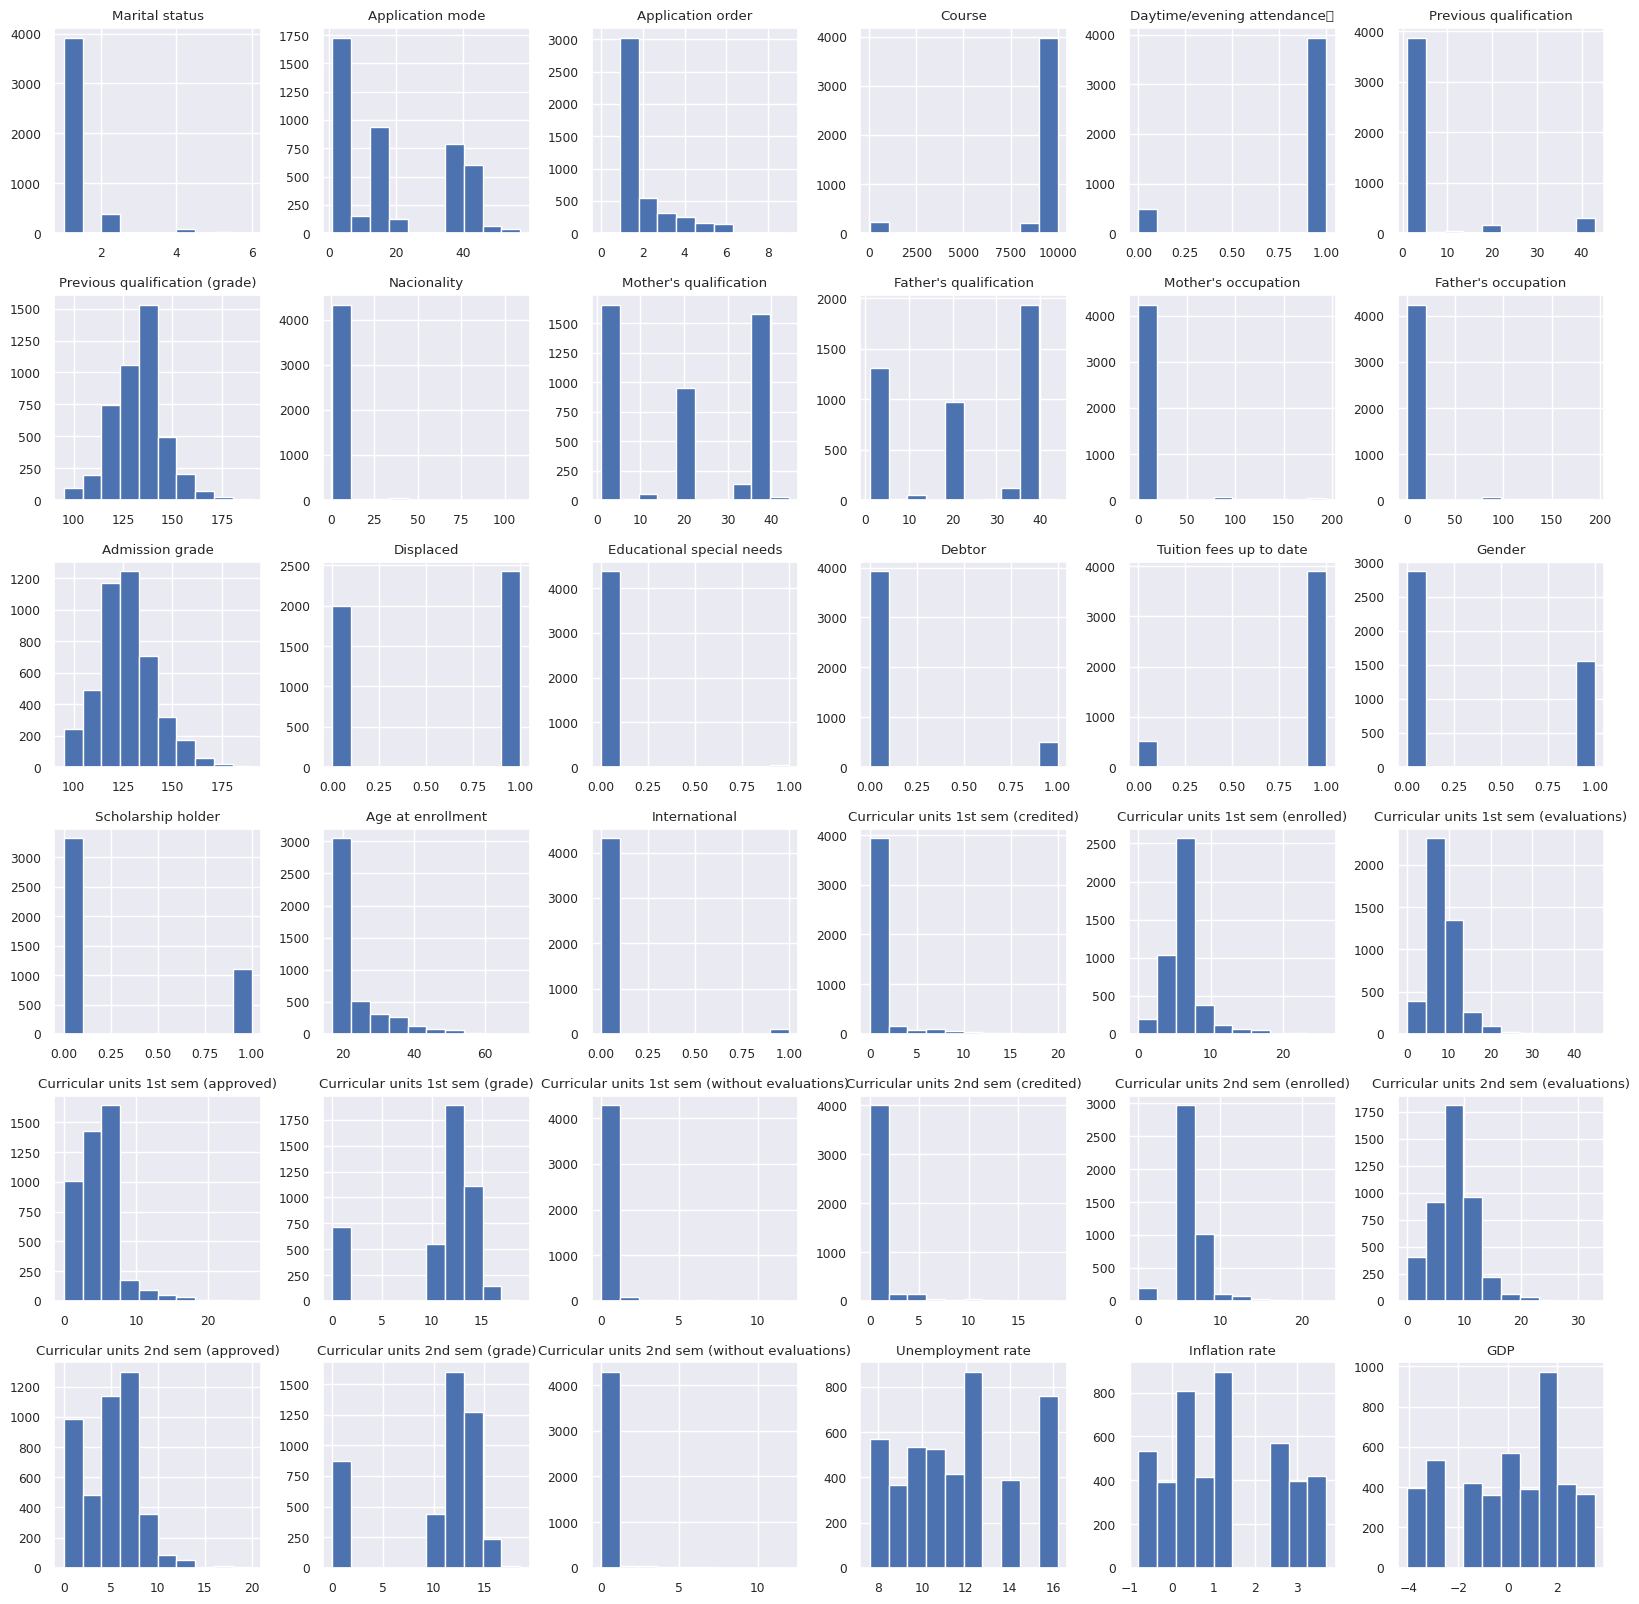

In [42]:
df.hist(figsize = (20, 20), grid = True)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


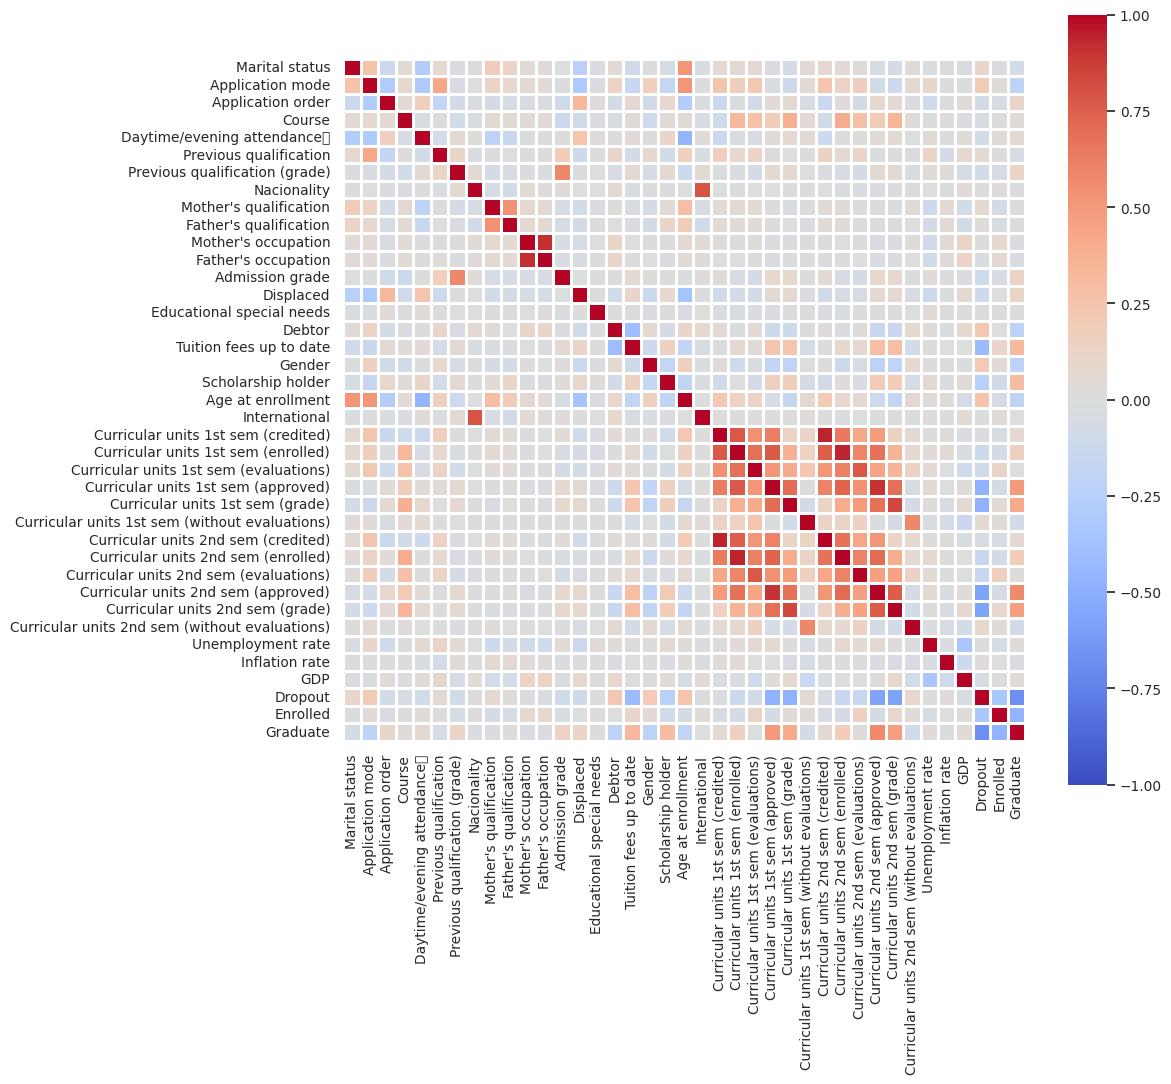

In [27]:
sns.set(rc = {'figure.figsize':(11,10)})
sns.set(font_scale=0.9)
corr = prepro_df.corr()
graph = sns.heatmap(corr, cmap= 'coolwarm', square = True,
                    vmin = -1, vmax = 1, center = 0,
                    linewidths = 1, linecolor='white')

There seems to be a linear correlation for (Scholarship holder, Age at enrollment, Curricucular units 1st sem(approved), Curricucular units 1st sem(graded), Curricucular units 2nd sem(approved), Curricucular units 2nd sem(graded), Application mode, Debtor, Tuition fees up to date, gender) to Target.

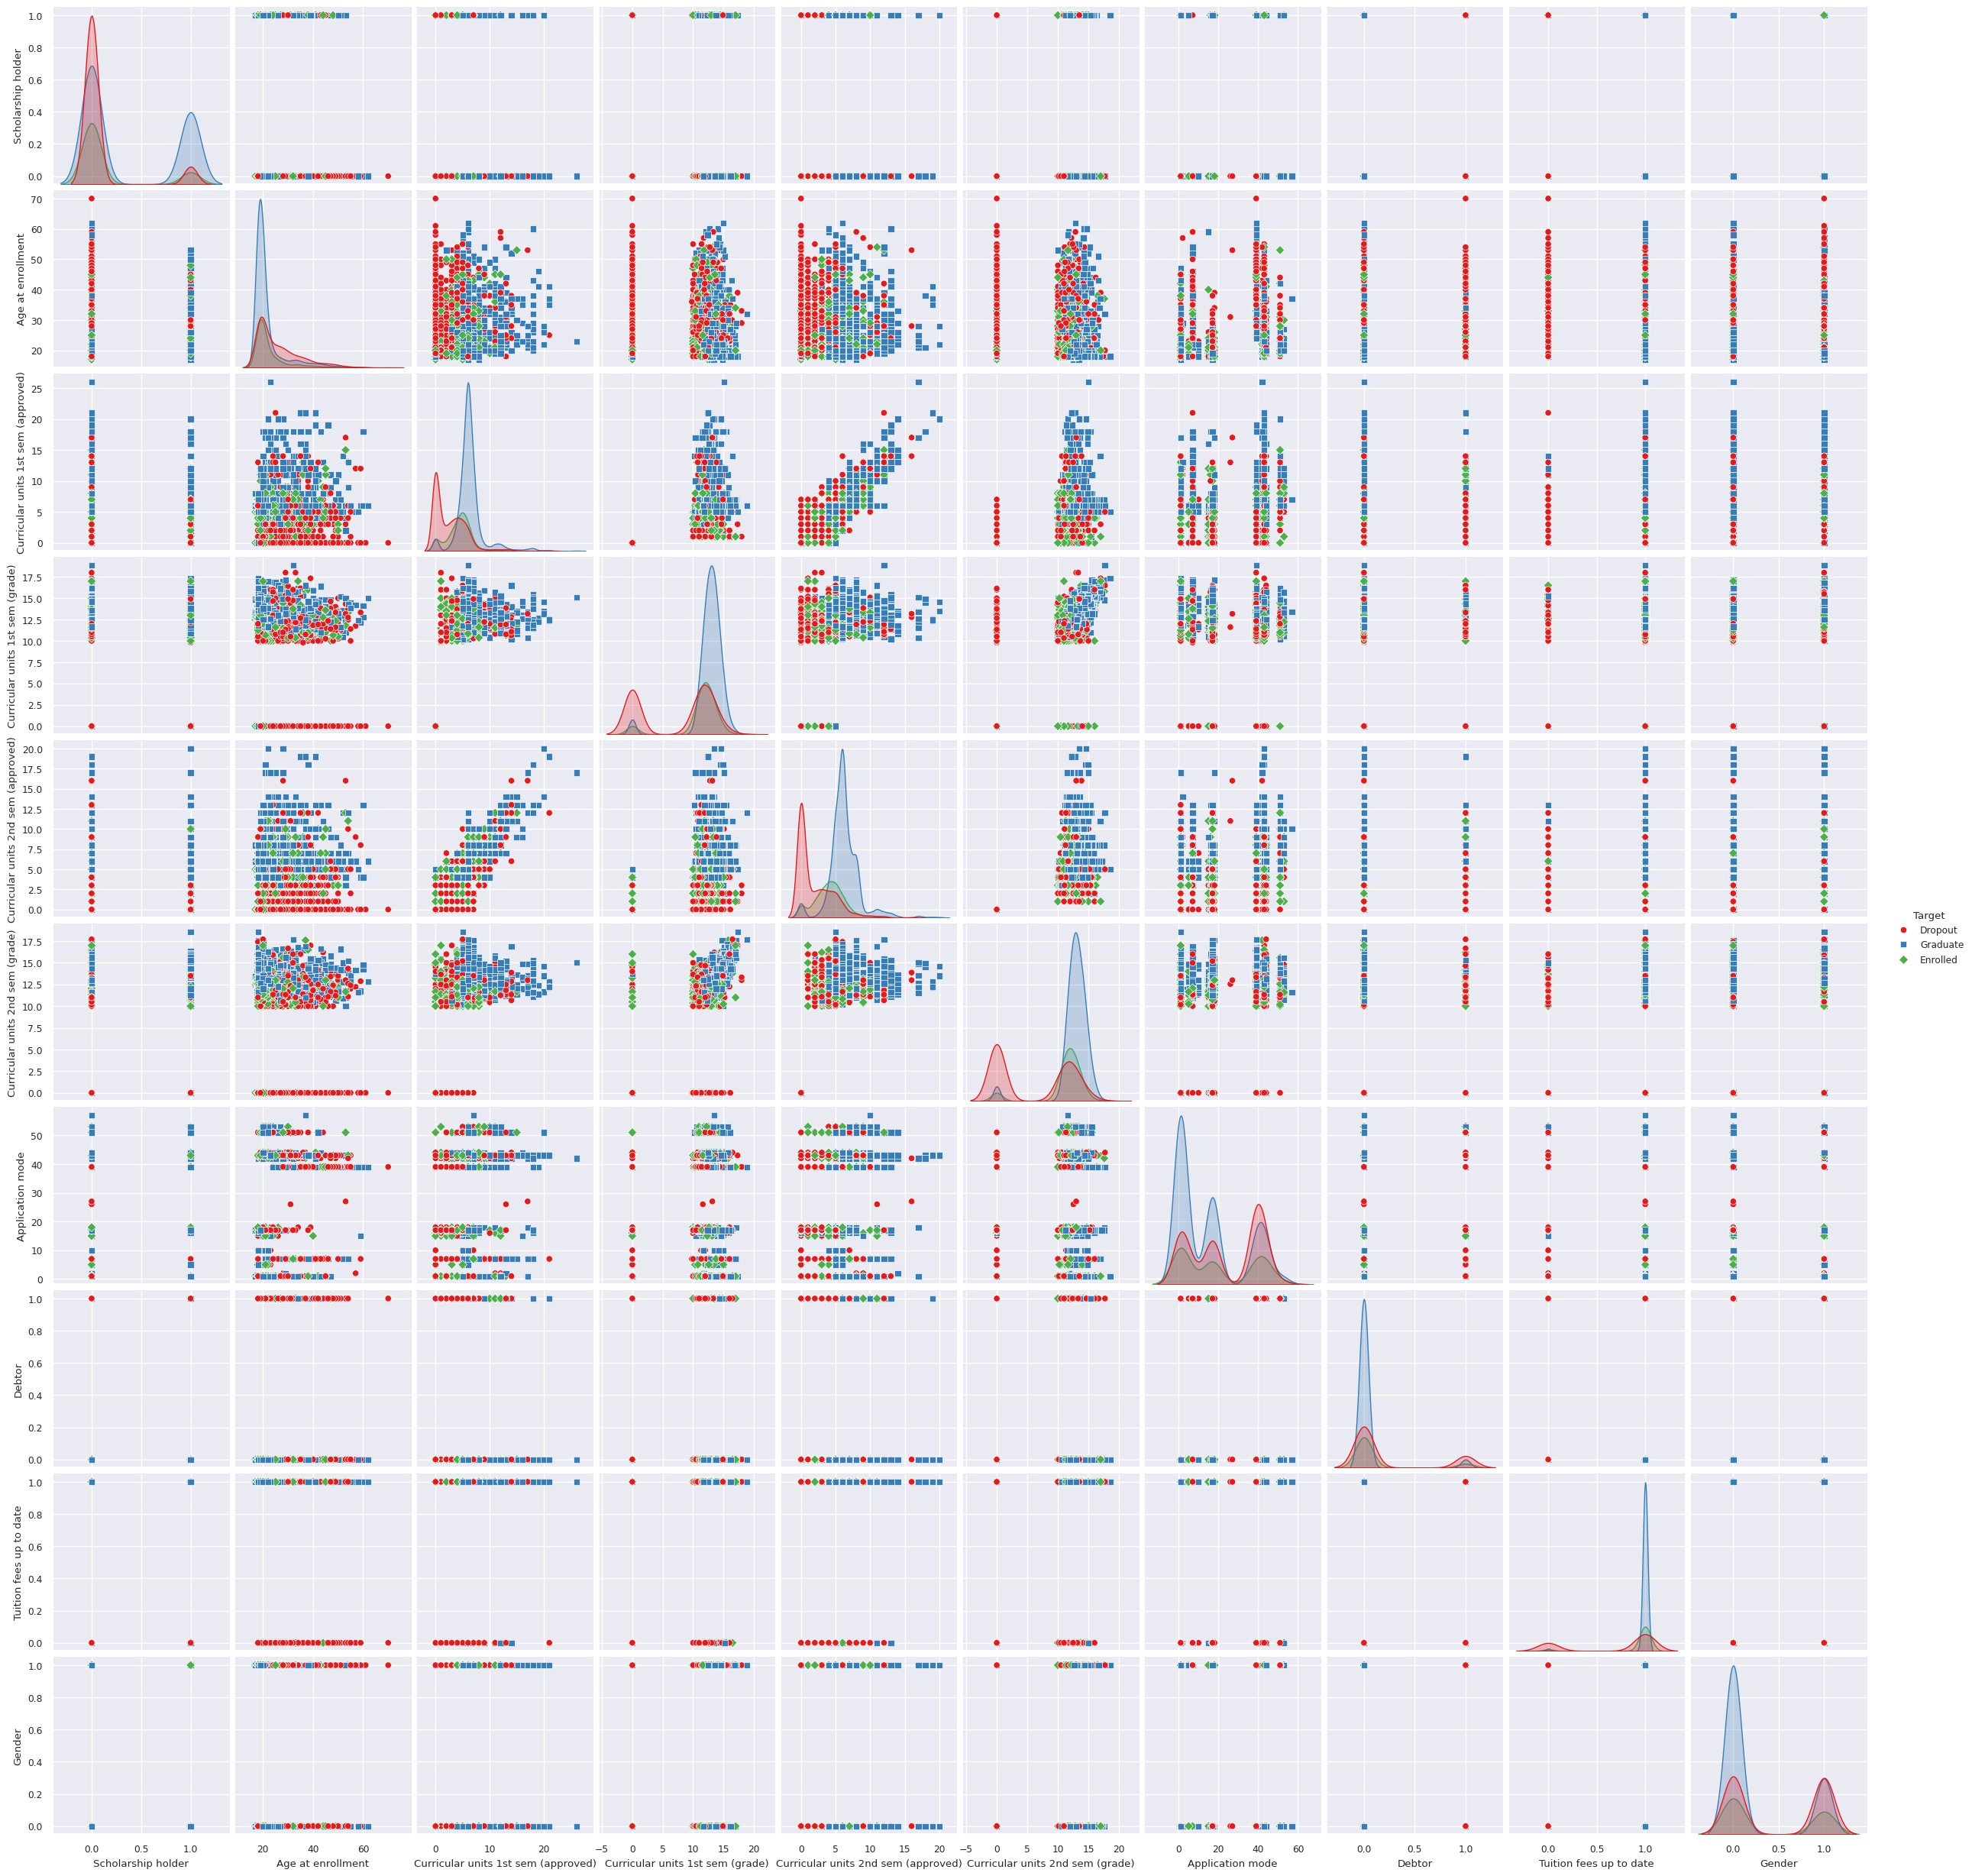

In [47]:
# print(df.columns)

# List of features to include in the pairplot
selected_features = [
    'Scholarship holder',
    'Age at enrollment',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Application mode',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Target'  # Include the target variable
]

# Create a DataFrame with the selected features
selected_data = df[selected_features]

# Plot pairplot
sns.pairplot(selected_data, hue='Target', markers=["o", "s", "D"], palette="Set1")
plt.show()

In [33]:
df_vis = pd.concat([prepro_df.drop(columns = ["Dropout", "Enrolled", "Graduate"]), df.Target], axis = 1)

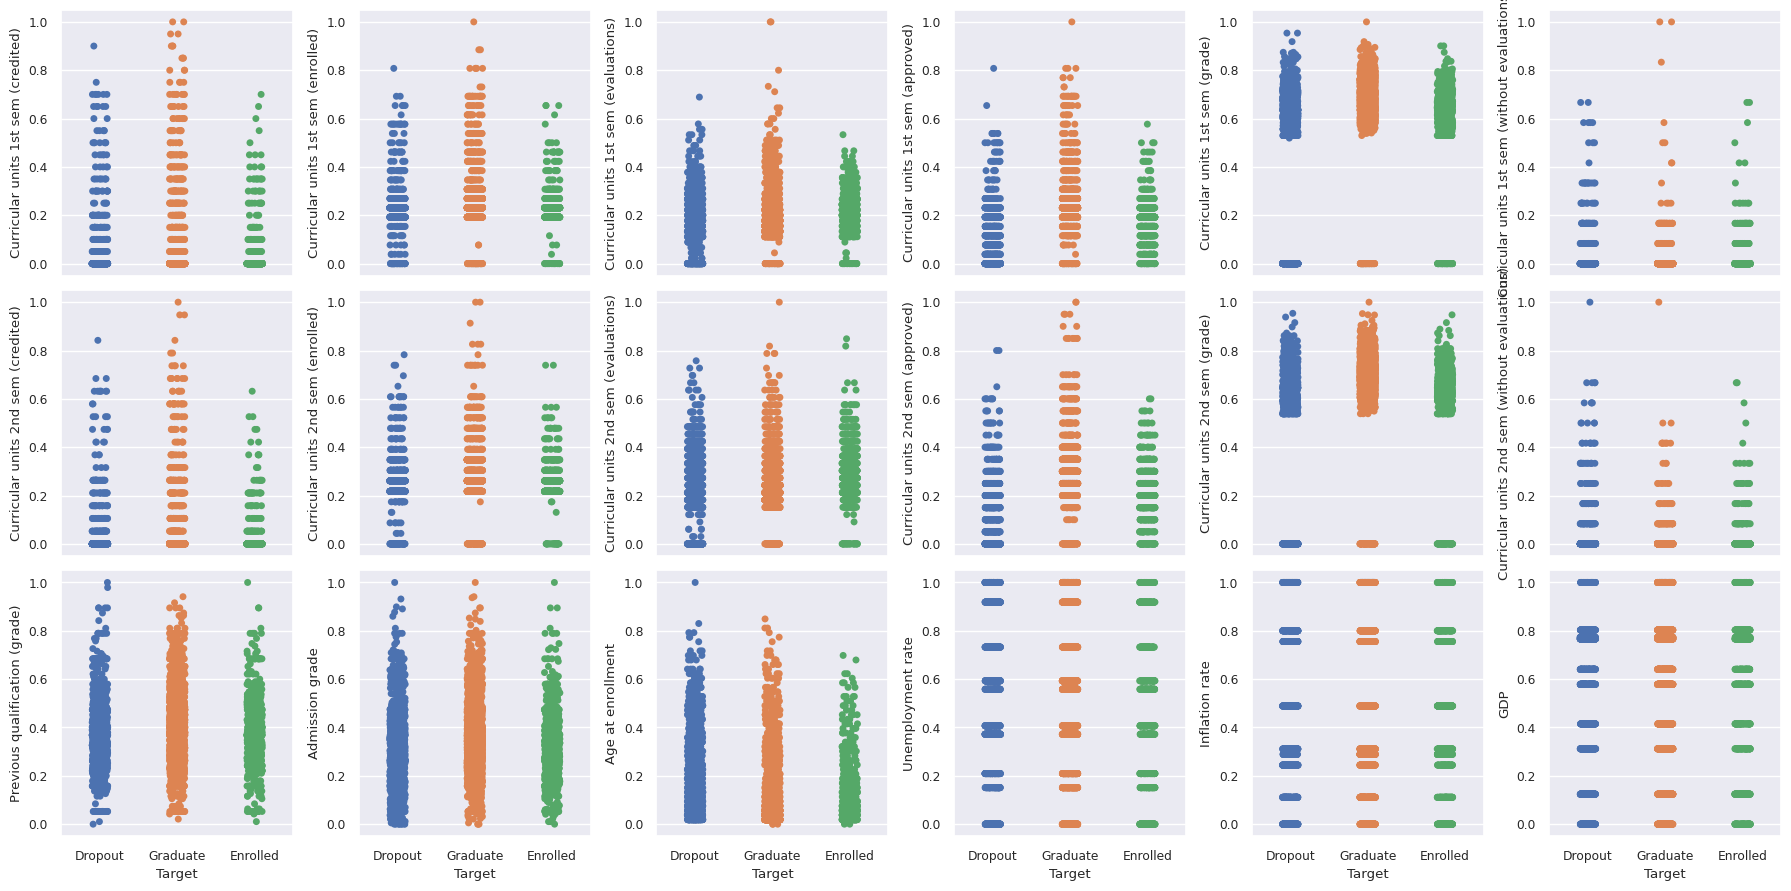

In [34]:
sns.set(font_scale=0.8)
figure, axes = plt.subplots(3,6, sharex = True, figsize = (18,9))
for x in range(3):
    for y in range(6):
        sns.stripplot(ax = axes[x,y], data = df_vis, x = "Target", hue = "Target", y = numerical[6*x+y])
figure.tight_layout()
plt.show()

In [35]:
for var in binary:
    df_vis[var] = df_vis.apply(lambda row: "yes" if row[var] == 1 else "no", axis=1)

df_vis['Gender'] = df_vis.apply(lambda row: "female" if row['Gender'] == "no" else "male", axis=1)
df_vis['Daytime/evening attendance\t'] = df_vis.apply(lambda row: "daytime" if row['Daytime/evening attendance\t'] == "yes" else "evening", axis=1)

<ipython-input-36-80249fd41a9b>:6: UserWarning: Glyph 9 (	) missing from current font.
  figure.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


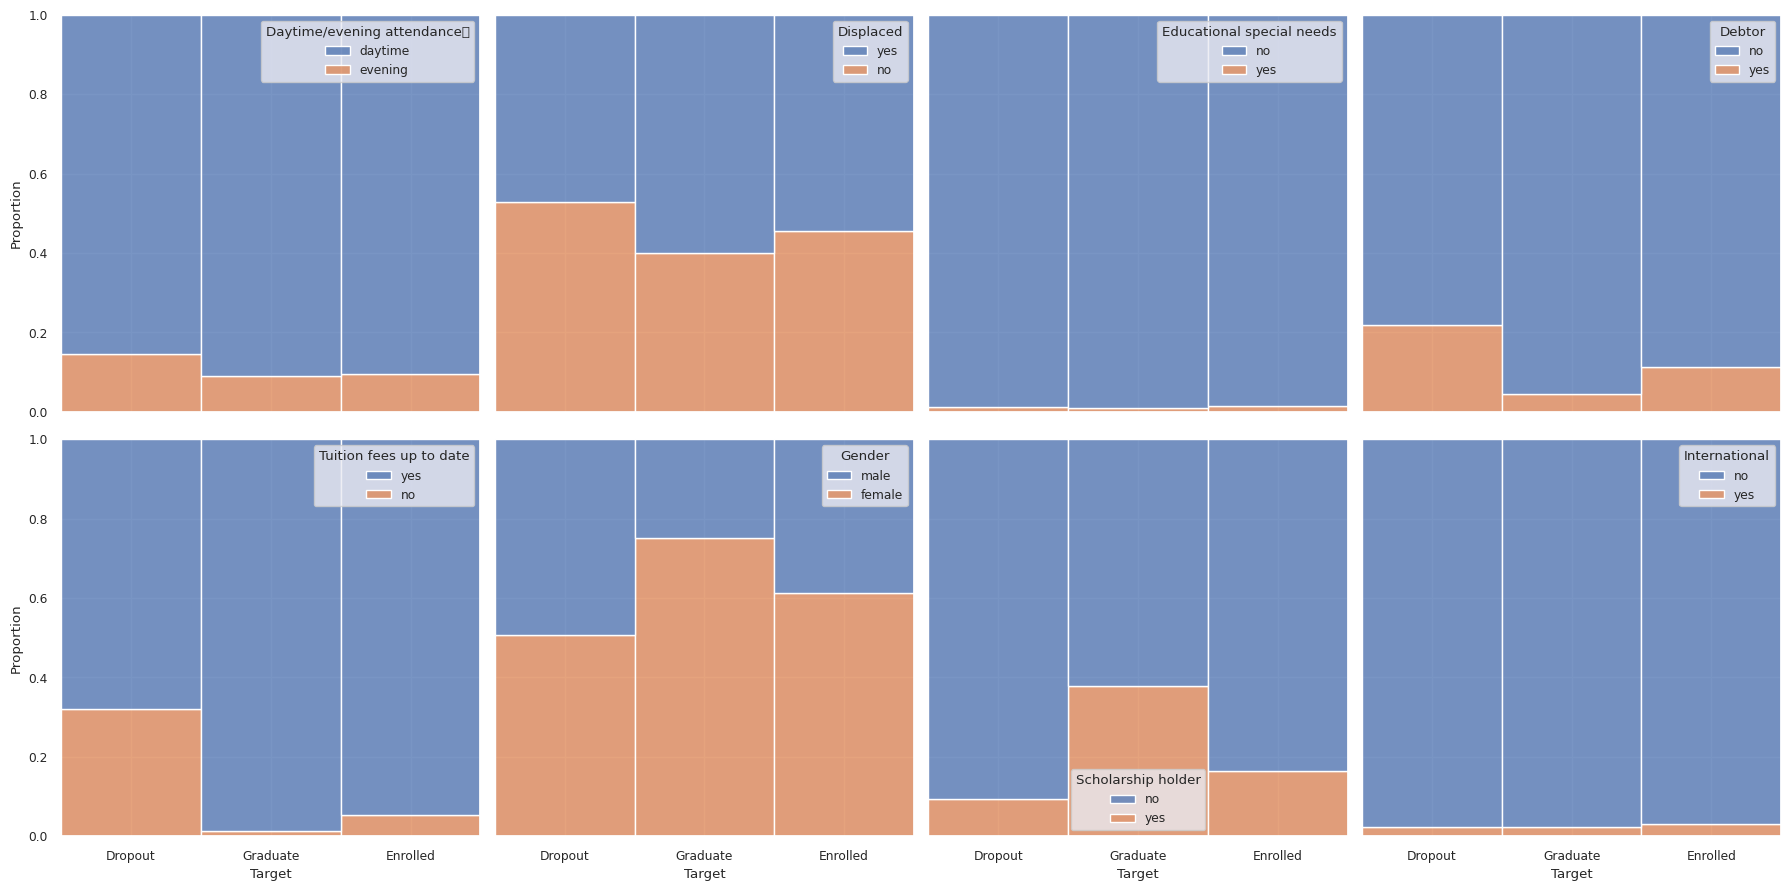

In [36]:
sns.set(font_scale=0.8)
figure, axes = plt.subplots(2,4, sharex = True, sharey = True, figsize = (18,9))
for x in range(2):
    for y in range(4):
        sns.histplot(ax = axes[x,y], data = df_vis, x = "Target", hue = binary[4*x+y], multiple="fill", stat="proportion")
figure.tight_layout()
plt.show()

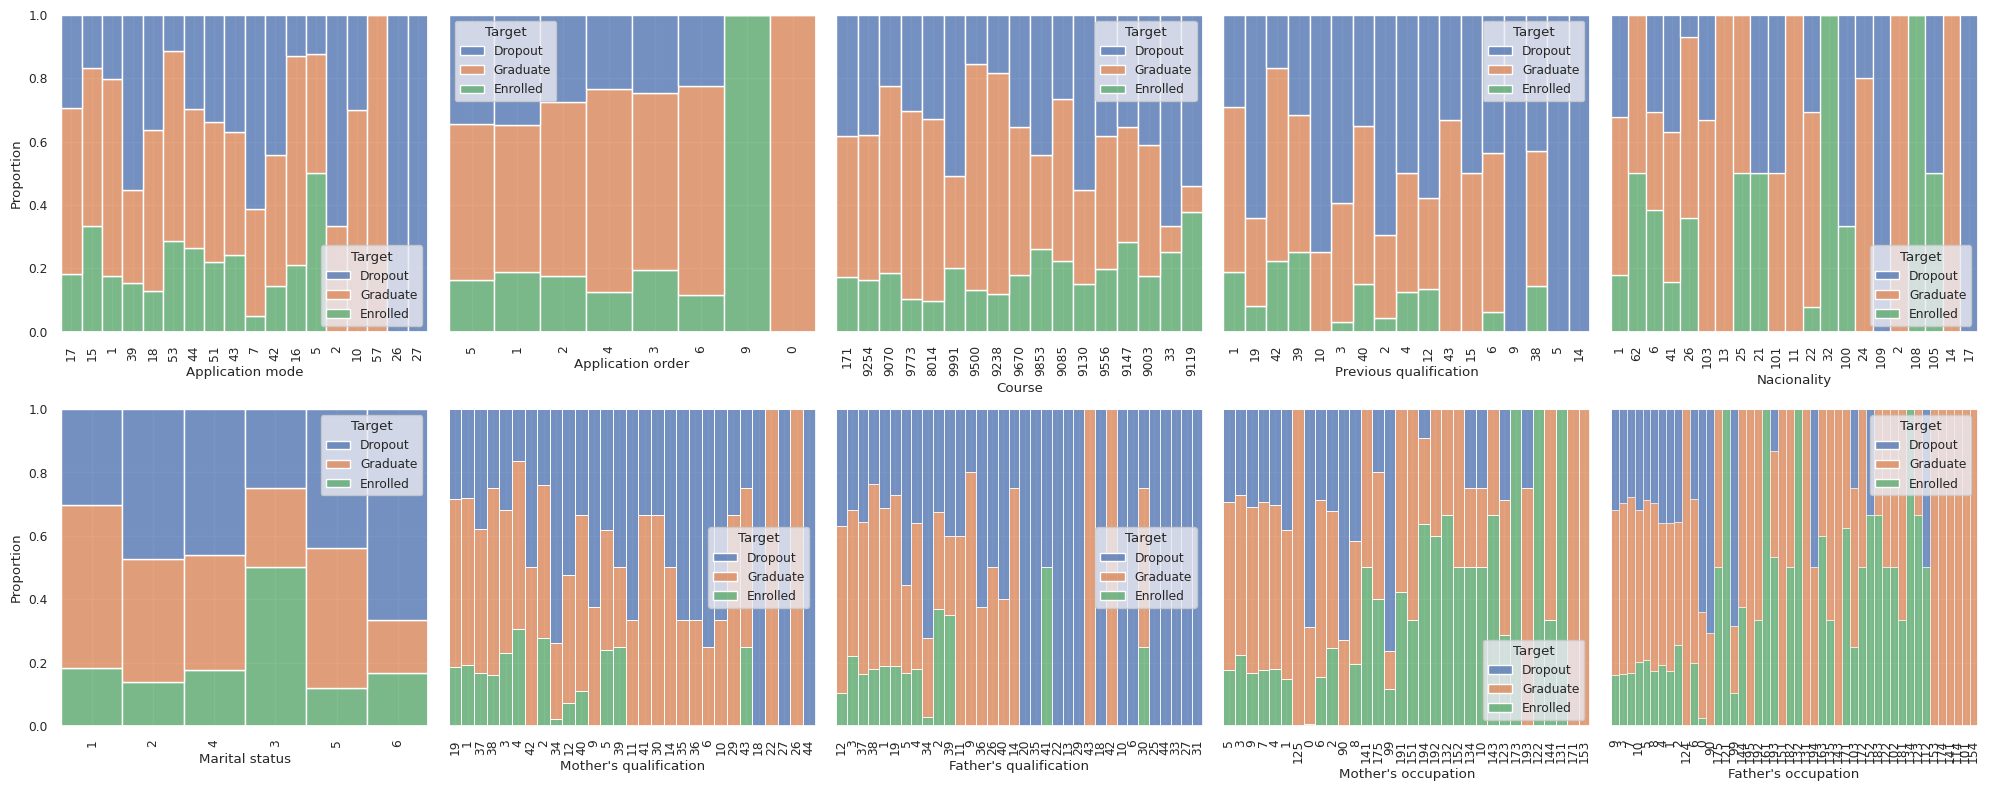

In [37]:
for var in categorical:
    df_vis[var] = df_vis[var].apply(str)

sns.set(font_scale=0.8)
figure, axes = plt.subplots(2,5, figsize = (20,8), sharey = True, )
for x in range(2):
    for y in range(5):
        sns.histplot(ax = axes[x,y], data = df_vis, x = categorical[5*x+y], hue = "Target", multiple="fill", stat="proportion")
        axes[x,y].tick_params(axis='x', labelrotation=90)
figure.tight_layout()
plt.show()

# Data Preprocessing

In [49]:
#find missing data
missing_values = df.isnull()
missing_count = df.isnull().sum()

In [50]:
print("DataFrame with missing values:")
display(df)

DataFrame with missing values:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [52]:
print("\nMissing values (True indicates missing):")
display(missing_values)


Missing values (True indicates missing):


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
print("\nCount of missing values in each column:")
print(missing_count)


Count of missing values in each column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder     

There is no missing data within the dataset.

In [16]:
X = df.drop("Target", axis=1)
y = df["Target"]#set y be the target

In [17]:
#find how many grad ,drop and enroll
y.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [18]:
corr = X.corr()
corr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.003183,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610
